In [1]:
import os
import sys
import cv2
import numpy as np
from typing import Tuple
sys.path.append('../')
from src.utils import get_path_to, show_image
from src.detector import StampDetector

In [2]:
stamp_detector = StampDetector()

In [3]:
# read all the images in the directory
dataset_path = get_path_to('input', 'datasets', 'igorkarayman', 'signatures-and-stamps', 'versions', '1', '1')
images = [f for f in os.listdir(dataset_path)]

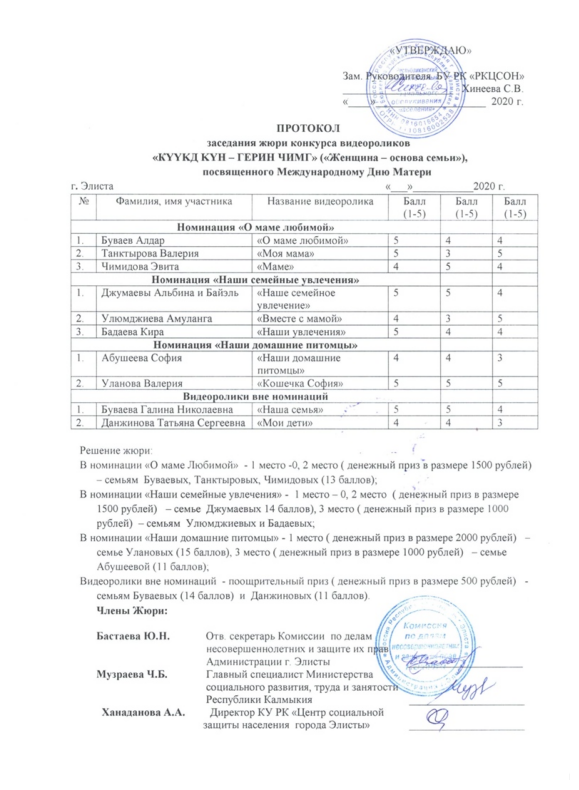

In [4]:
image = cv2.imread(os.path.join(dataset_path, images[159]))
show_image(image)

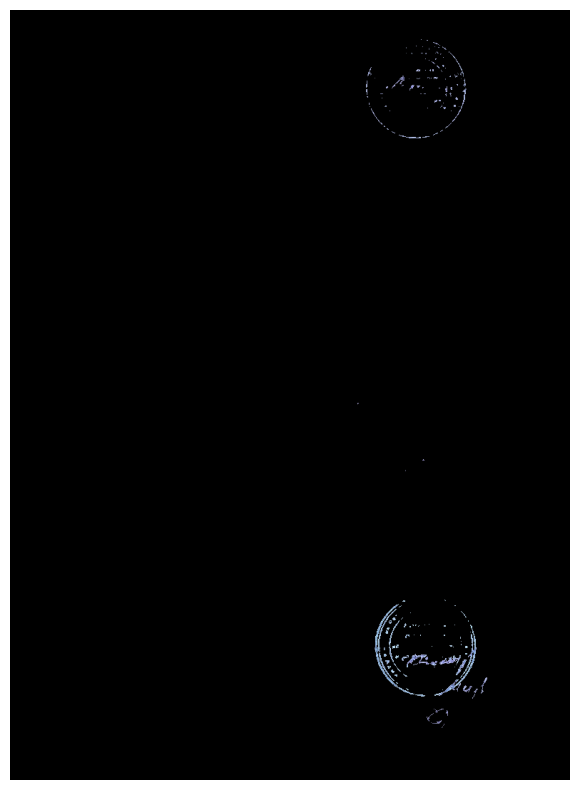

In [5]:
segmented_image = stamp_detector.segment(image)
show_image(segmented_image)

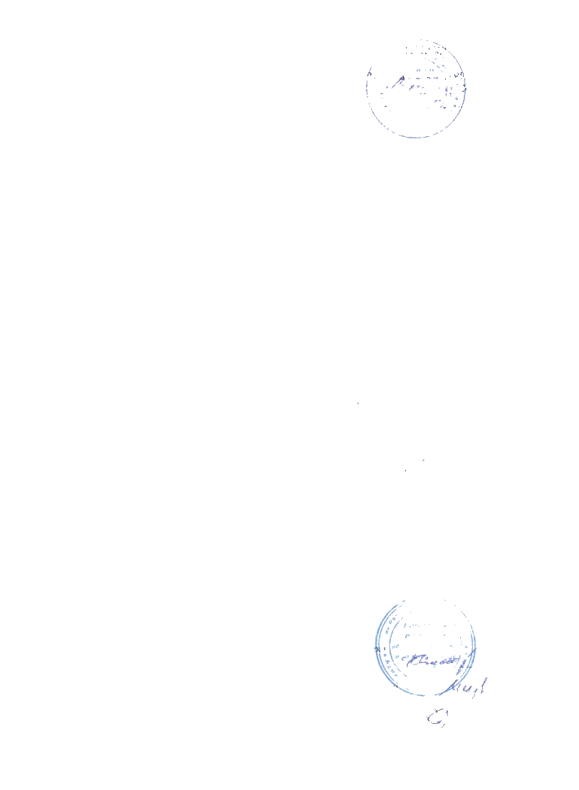

In [6]:
segmented_masked_image = stamp_detector.apply_segment_mask(image, segmented_image)
show_image(segmented_masked_image)

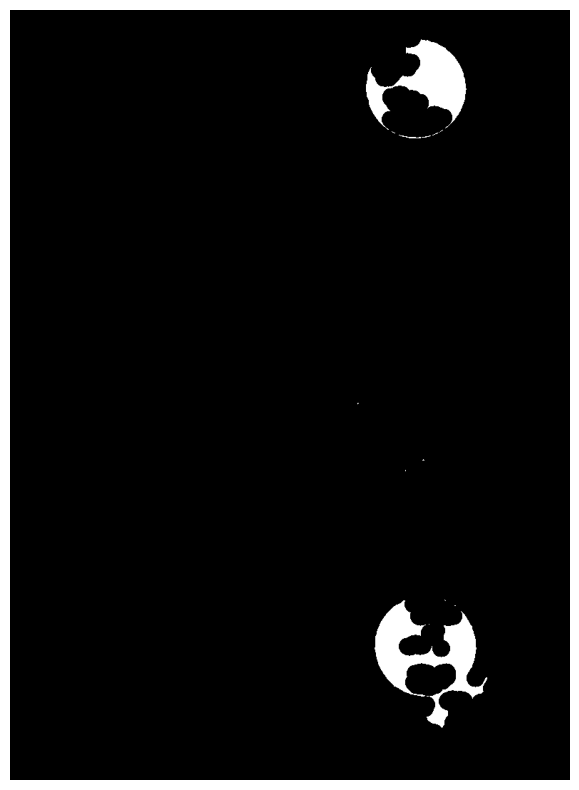

In [8]:
merged_image = stamp_detector.merge_connected_components(segmented_masked_image)
show_image(merged_image)

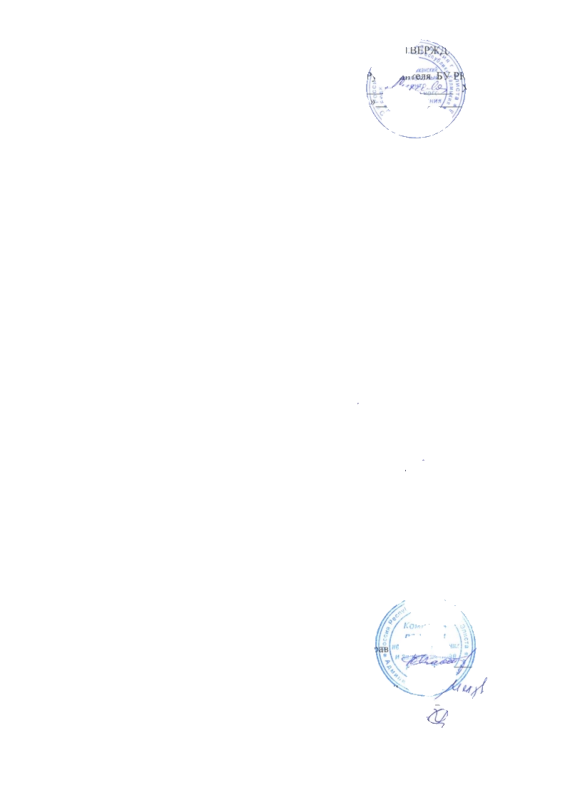

In [9]:
merged_masked_image = stamp_detector.apply_segment_mask(image, merged_image)
show_image(merged_masked_image)

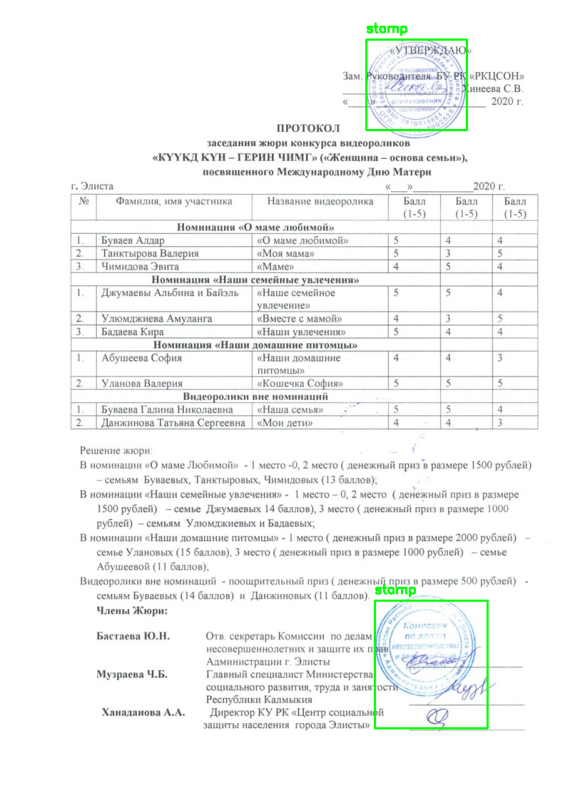

In [10]:
boxed_img = stamp_detector.draw_bounding_boxes(image, merged_masked_image, class_name="stamp")
show_image(boxed_img)